<a href="https://colab.research.google.com/github/amien1410/colab-notebooks/blob/main/Colab_Pyspark_Utility_Functions_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pyspark
!pip install pyspark

# initiate pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# download sample
!wget -O movies.csv "https://raw.githubusercontent.com/Apress/applied-data-science-using-pyspark/refs/heads/main/Ch02/Chapter2_Data/movie_data_part1.csv"
df = spark.read.csv("movies.csv", header=True, sep='|', inferSchema=False)
df.show(10)

--2025-06-16 00:23:07--  https://raw.githubusercontent.com/Apress/applied-data-science-using-pyspark/refs/heads/main/Ch02/Chapter2_Data/movie_data_part1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29227553 (28M) [text/plain]
Saving to: ‘movies.csv’

movies.csv          100%[===================>]  27.87M   134MB/s    in 0.2s    

2025-06-16 00:23:09 (134 MB/s) - ‘movies.csv’ saved [29227553/29227553]

+---------------------+------+-----+-----------------+--------------------+--------------------+----------+--------------------+--------------------+------------+-------+-------+--------+--------------------+--------------------+------------+
|belongs_to_collection|budget|   id|original_language|      original_title|            overview|popularity|produc

In [ ]:
#@title Casting Multiple Columns

#Importing necessary libraries
from pyspark.sql.types import *

#Identifying and assigning lists of variables
int_vars=['id']
float_vars=['budget', 'popularity', 'revenue']
date_vars=['release_date']

#Converting integer variables
for column in int_vars:
  df = df.withColumn(column,df[column].cast(IntegerType()))

# Converting float variables
for column in float_vars:
  df=df.withColumn(column,df[column].cast(FloatType()))

# Converting float variables
for column in date_vars:
  df=df.withColumn(column,df[column].cast(DateType()))

df.dtypes

[('belongs_to_collection', 'string'),
 ('budget', 'float'),
 ('id', 'int'),
 ('original_language', 'string'),
 ('original_title', 'string'),
 ('overview', 'string'),
 ('popularity', 'float'),
 ('production_companies', 'string'),
 ('production_countries', 'string'),
 ('release_date', 'date'),
 ('revenue', 'float'),
 ('runtime', 'string'),
 ('status', 'string'),
 ('tagline', 'string'),
 ('title', 'string'),
 ('vote_average', 'string')]

In [ ]:
# using when function
df_with_newcols = df.select('id', 'budget','popularity').\
withColumn('budget_cat', when(df['budget']<10000000,'Small').when(df['budget']<100000000,'Medium').otherwise('Big')).\
withColumn('ratings', when(df['popularity']<3,'Low').
when(df['popularity']<5,'Mid').otherwise('High'))

df_with_newcols.show(15, False)

+-----+---------+----------+----------+-------+
|id   |budget   |popularity|budget_cat|ratings|
+-----+---------+----------+----------+-------+
|43000|0.0      |2.503     |Small     |Low    |
|43001|0.0      |5.51      |Small     |High   |
|43002|0.0      |5.62      |Small     |High   |
|43003|0.0      |7.159     |Small     |High   |
|43004|500000.0 |3.988     |Small     |Mid    |
|43006|0.0      |3.194     |Small     |Mid    |
|43007|0.0      |2.689     |Small     |Low    |
|43008|0.0      |6.537     |Small     |High   |
|43010|0.0      |4.297     |Small     |Mid    |
|43011|0.0      |4.417     |Small     |Mid    |
|43012|7000000.0|4.722     |Small     |Mid    |
|43013|0.0      |2.543     |Small     |Low    |
|43014|0.0      |4.303     |Small     |Mid    |
|43015|0.0      |3.493     |Small     |Mid    |
|43016|0.0      |2.851     |Small     |Low    |
+-----+---------+----------+----------+-------+
only showing top 15 rows



In [ ]:
# Concatenating two variables
df_with_newcols = df_with_newcols.withColumn('BudgetRating_Category',concat(df_with_newcols.budget_cat,df_with_newcols.ratings))

# Changing the new variable to lowercase
df_with_newcols = df_with_newcols.withColumn('BudgetRating_Category',trim(lower(df_with_newcols.BudgetRating_Category)))
df_with_newcols.show()

+-----+---------+----------+----------+-------+---------------------+
|   id|   budget|popularity|budget_cat|ratings|BudgetRating_Category|
+-----+---------+----------+----------+-------+---------------------+
|43000|      0.0|     2.503|     Small|    Low|             smalllow|
|43001|      0.0|      5.51|     Small|   High|            smallhigh|
|43002|      0.0|      5.62|     Small|   High|            smallhigh|
|43003|      0.0|     7.159|     Small|   High|            smallhigh|
|43004| 500000.0|     3.988|     Small|    Mid|             smallmid|
|43006|      0.0|     3.194|     Small|    Mid|             smallmid|
|43007|      0.0|     2.689|     Small|    Low|             smalllow|
|43008|      0.0|     6.537|     Small|   High|            smallhigh|
|43010|      0.0|     4.297|     Small|    Mid|             smallmid|
|43011|      0.0|     4.417|     Small|    Mid|             smallmid|
|43012|7000000.0|     4.722|     Small|    Mid|             smallmid|
|43013|      0.0|   

In [ ]:
#@title Registering Dataframes

# Registering temporary table
df_with_newcols.registerTempTable('temp_data')

# Applying the function to show the results
spark.sql('select ratings, count(ratings) from temp_data group by ratings').show(10, False)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+-------+--------------+
|ratings|count(ratings)|
+-------+--------------+
|High   |16856         |
|Low    |14865         |
|Mid    |12277         |
+-------+--------------+



In [ ]:
#@title Window Functions

# Importing the window functions
from pyspark.sql.window import *

# Step 1: Filtering the missing values
df_with_newcols=df_with_newcols.filter( (df_with_newcols['popularity'].isNotNull()) & (~isnan(df_with_newcols['popularity'])) )

# Step 2: Applying the window functions for calculating deciles
df_with_newcols = df_with_newcols.select("id","budget","popularity", ntile(10).over(Window.partitionBy().orderBy(df_with_newcols['popularity'].desc())).alias("decile_rank"))

# Step 3:Dispalying the values
df_with_newcols.groupby("decile_rank").agg(min('popularity').alias('min_popularity'),max('popularity').alias('max_popularity'),count('popularity')).show()

+-----------+--------------+--------------+-----------------+
|decile_rank|min_popularity|max_popularity|count(popularity)|
+-----------+--------------+--------------+-----------------+
|          1|        10.185|         180.0|             4379|
|          2|         7.481|        10.182|             4379|
|          3|         5.841|         7.481|             4379|
|          4|         4.823|         5.841|             4378|
|          5|         4.054|         4.822|             4378|
|          6|         3.383|         4.054|             4378|
|          7|         2.747|         3.383|             4378|
|          8|         2.075|         2.747|             4378|
|          9|         1.389|         2.075|             4378|
|         10|           0.6|         1.389|             4378|
+-----------+--------------+--------------+-----------------+



In [ ]:
#@title FInd the second most popular movie in the year 1970

# Step 1: Import the window functions
from pyspark.sql.window import *

# Step 2: Select the required subset of columns
df_second_best = df.select('id', 'popularity', 'release_date')

# Step 3: Create the year column from release date
df_second_best = df_second_best.withColumn('release_year',year('release_date')).drop('release_date')

# Step 4: Define partition function
year_window = Window.partitionBy(df_second_best['release_year']).orderBy(df_with_newcols['popularity'].desc())

# Step 5: Apply partition function
df_second_best = df_second_best.select('id', 'popularity', 'release_year',rank().over(year_window).alias("rank"))

# Step 6: Find the second best rating for the year 1970
df_second_best.filter((df_second_best['release_year'] == 1970) & (df_second_best['rank']==2)).show()

+-----+----------+------------+----+
|   id|popularity|release_year|rank|
+-----+----------+------------+----+
|11202|    14.029|        1970|   2|
+-----+----------+------------+----+



In [ ]:
#@title what is the difference between the revenue of the highest-grossing film of the year and other films within that year?

from pyspark.sql.functions import col, to_date, year, max
from pyspark.sql.window import Window

# Convert release_date and extract year
df_revenue = df.select(
    'id',
    'revenue',
    to_date('release_date', 'yyyy-MM-dd').alias('release_date')
).withColumn('release_year', year('release_date'))

# Filter out rows with nulls in critical columns
df_revenue = df_revenue.filter(col('id').isNotNull() & col('revenue').isNotNull() & col('release_year').isNotNull())

# Define window
windowRev = Window.partitionBy('release_year')\
                  .orderBy(col('revenue').desc())\
                  .rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Add revenue difference
df_revenue = df_revenue.withColumn(
    'revenue_difference',
    max(col('revenue')).over(windowRev) - col('revenue')
)

# Show final result
df_revenue.select('id', 'revenue', 'release_year', 'revenue_difference').show(10, False)

+-----+---------+------------+------------------+
|id   |revenue  |release_year|revenue_difference|
+-----+---------+------------+------------------+
|70512|0.0      |1911        |0.0               |
|46751|0.0      |1911        |0.0               |
|96128|1800000.0|1913        |0.0               |
|28627|0.0      |1913        |1800000.0         |
|56511|0.0      |1913        |1800000.0         |
|56516|0.0      |1913        |1800000.0         |
|98078|0.0      |1914        |0.0               |
|28196|0.0      |1914        |0.0               |
|5153 |0.0      |1914        |0.0               |
|22943|0.0      |1914        |0.0               |
+-----+---------+------------+------------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import col, to_date, year, max
from pyspark.sql.window import Window

# Convert release_date and extract year
df_revenue = df.select(
    'id',
    'revenue',
    to_date('release_date', 'yyyy-MM-dd').alias('release_date')
).withColumn('release_year', year('release_date'))

# Filter out rows with nulls in critical columns
df_revenue = df_revenue.filter(col('id').isNotNull() & col('revenue').isNotNull() & col('release_year').isNotNull())

# Define window
windowRev = Window.partitionBy('release_year')\
                  .orderBy(col('revenue').desc())\
                  .rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Add revenue difference
df_revenue = df_revenue.withColumn(
    'revenue_difference',
    max(col('revenue')).over(windowRev) - col('revenue')
)

# Show final result
df_revenue.select('id', 'revenue', 'release_year', 'revenue_difference').show(10, False)

+-----+---------+------------+------------------+
|id   |revenue  |release_year|revenue_difference|
+-----+---------+------------+------------------+
|70512|0.0      |1911        |0.0               |
|46751|0.0      |1911        |0.0               |
|96128|1800000.0|1913        |0.0               |
|28627|0.0      |1913        |1800000.0         |
|56511|0.0      |1913        |1800000.0         |
|56516|0.0      |1913        |1800000.0         |
|98078|0.0      |1914        |0.0               |
|28196|0.0      |1914        |0.0               |
|5153 |0.0      |1914        |0.0               |
|22943|0.0      |1914        |0.0               |
+-----+---------+------------+------------------+
only showing top 10 rows



In [ ]:
#@title Collect List

# Step 1: Create the year column from release date
df = df.withColumn('release_year',year('release_date'))

# Step 2: Apply collect_list function to gather all occurrences
df.filter("title=='The Lost World'").groupby('title').agg(collect_list("release_year")).show(1,False)

+--------------+------------------------------------+
|title         |collect_list(release_year)          |
+--------------+------------------------------------+
|The Lost World|[1999, 2001, 1925, 1960, 1992, 1998]|
+--------------+------------------------------------+



In [ ]:
from pyspark.sql import functions as F

(df
    # 1️⃣  Filter first – touch as few rows as possible
    .where(F.col("title") == "The Lost World")

    # 2️⃣  Project only the two columns you still need
    .select(
        "title",
        F.year("release_date").alias("release_year")   # compute year on-the-fly
    )

    # 3️⃣  Single shuffle: group → collect_list
    .groupBy("title")
    .agg(
        F.sort_array(            # optional: deterministic order
            F.collect_list("release_year")
        ).alias("release_years")
    )
    .show(1, False)
)


+--------------+------------------------------------+
|title         |release_years                       |
+--------------+------------------------------------+
|The Lost World|[1925, 1960, 1992, 1998, 1999, 2001]|
+--------------+------------------------------------+



In [ ]:
# Cache if reused
sub = df.where(F.col("title") == "The Lost World").select("title", F.year("release_date").alias("release_year"))
sub.cache()

DataFrame[title: string, release_year: int]

In [ ]:
# Repartition on the grouping key
sub = sub.repartition("title")

In [ ]:
#@title Sampling

# Simple random sampling in PySpark without replacement
df_sample = df.sample(False, 0.4, seed=11)
print(f"Sample size: {df_sample.count()}")

Sample size: 17627


In [ ]:
# Simple random sampling in PySpark with replacement
df_sample = df.sample(True, 0.4, 11)
df_sample.count()

17645

In [ ]:
# Stratified sampling in PySpark
df_strat = df.sampleBy("release_year", fractions={1959: 0.2, 1960: 0.4,1961: 0.4}, seed=11)
df_strat.count()

241

In [ ]:
# Saving the output
df.write.format('csv').option('delimiter', '|').save('output_df')

In [ ]:
# Saving from multiple cluster
df.coalesce(1).write.format('csv').option('delimiter', '|').save('output_coalesced_df')

In [ ]:
# Saving with partition
df.write.partitionBy('release_year').format('csv').option('delimiter', '|').save('output_df_partitioned')

In [ ]:
# Saving to hive table
df.write.saveAsTable('film_ratings')

In [ ]:
# Saving to pandas dataframe

# Pandas to PySpark
df_pandas=df.toPandas()

# Pandas to PySpark
df_py = spark.createDataFrame(df_pandas)

In [ ]:
#@title Joins

# Step 1: Download the ZIP file
!wget -O movie_data.zip "https://github.com/Apress/applied-data-science-using-pyspark/raw/refs/heads/main/Ch02/Chapter2_Data/movie_data_part2_v1.csv.zip"

# Step 2: Unzip the file
!unzip -o movie_data.zip

# Step 3: Rename the extracted CSV file
!mv "movie_data_part2_v1.csv" "movie_data2.csv"

--2025-06-12 14:16:33--  https://github.com/Apress/applied-data-science-using-pyspark/raw/refs/heads/main/Ch02/Chapter2_Data/movie_data_part2_v1.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Apress/applied-data-science-using-pyspark/refs/heads/main/Ch02/Chapter2_Data/movie_data_part2_v1.csv.zip [following]
--2025-06-12 14:16:33--  https://raw.githubusercontent.com/Apress/applied-data-science-using-pyspark/refs/heads/main/Ch02/Chapter2_Data/movie_data_part2_v1.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21172903 (20M) [application/zip]
Saving to: ‘movie_data.zip’

movie_data

In [ ]:
# Input parameters
file_location = "movie_data2.csv"
file_type = "csv"
infer_schema = "False"
first_row_is_header = "True"
delimiter = "|"

# Bring all the options together to read the csv file
df_p1 = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.option("header", first_row_is_header) \
.option("sep", delimiter) \
.load(file_location)

# Cast identifer into the right datatype
df_p1 = df_p1.withColumn('id',df_p1['id'].cast("integer"))

# Filter missing values
df_p1 = df_p1.filter((df_p1['id'].isNotNull()) & (~isnan(df_p1['id'])))

In [ ]:
# Inner join
df.join(df_p1, df['id'] == df_p1['id'],'inner').printSchema()
df.join(df_p1, df['id'] == df_p1['id']).count()

root
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: float (nullable = true)
 |-- id: integer (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: float (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- runtime: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string

24998

In [ ]:
# Left Join
df.join(df_p1, df['id'] == df_p1['id'],'left').count()

43998

In [ ]:
# Right Join
df.join(df_p1, df['id'] == df_p1['id'],'right').count()

24998

In [ ]:
df.join(df_p1, df['id'] == df_p1['id'],'outer').count()

43998

In [ ]:
# Left Anti Join
df.join(df_p1, df['id'] == df_p1['id'],'left_anti').printSchema()
df.join(df_p1, df['id'] == df_p1['id'],'left_anti').count()

root
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: float (nullable = true)
 |-- id: integer (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: float (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- runtime: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)
 |-- release_year: integer (nullable = true)



19000

In [ ]:
# Left Semi Join
df.join(df_p1, df['id'] == df_p1['id'],'left_semi').printSchema()
df.join(df_p1, df['id'] == df_p1['id'],'left_semi').count()

root
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: float (nullable = true)
 |-- id: integer (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: float (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- runtime: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)
 |-- release_year: integer (nullable = true)



24998

In [ ]:
# Broadcast Join
df.join(broadcast(df_p1), df['id'] == df_p1['id'],'left_semi').count()

24998

In [ ]:
# Dropping duplicates
df.dropDuplicates(['title','release_year']).count()

43643

In [ ]:
# Original Data count
df.count()

43998

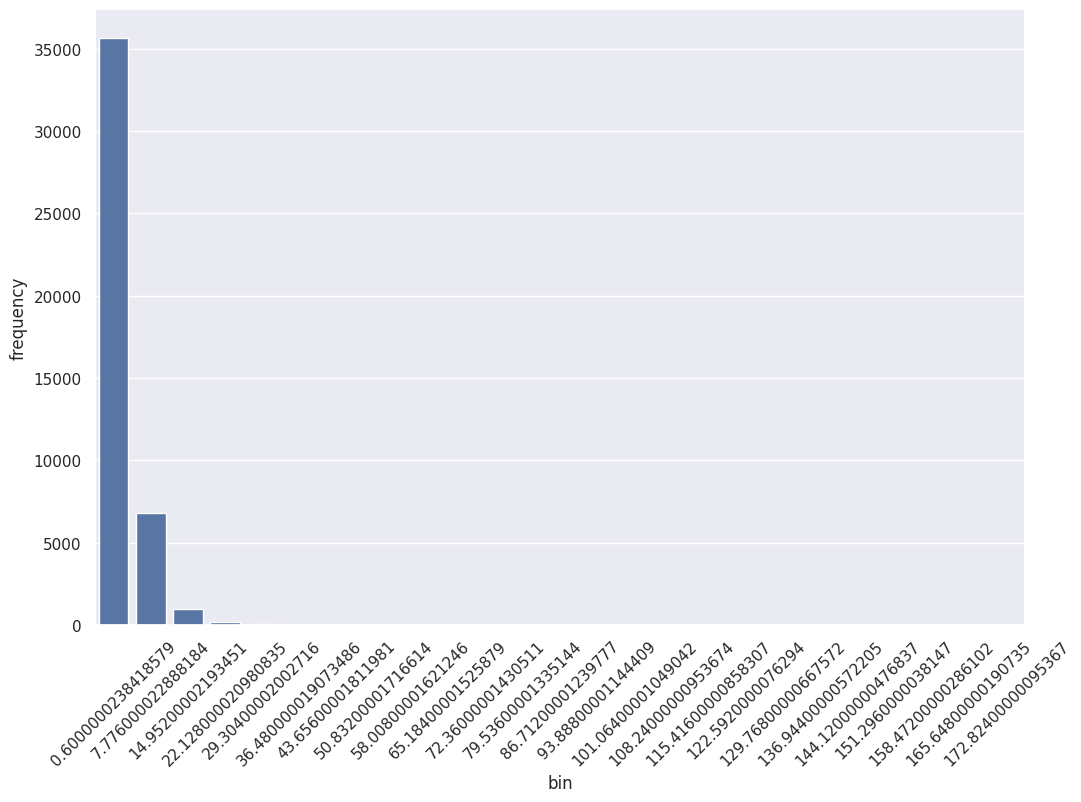

In [ ]:
#@title Data Visualization

# Step 1: Importing the required libraries
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Step 2: Processing the data in Spark. We can use the histogram function from the RDD
histogram_data = df.select('popularity').rdd.flatMap(lambda x:x).histogram(25)

# Step 3: Loading the Computed Histogram into a pandas DataFrame for plotting
hist_df=pd.DataFrame(list(zip(*histogram_data)), columns=['bin','frequency'])

# Step 4: Plotting the data
sns.set(rc={"figure.figsize": (12, 8)})
sns.barplot(x=hist_df['bin'], y=hist_df['frequency'])
plt.xticks(rotation=45)
plt.show()

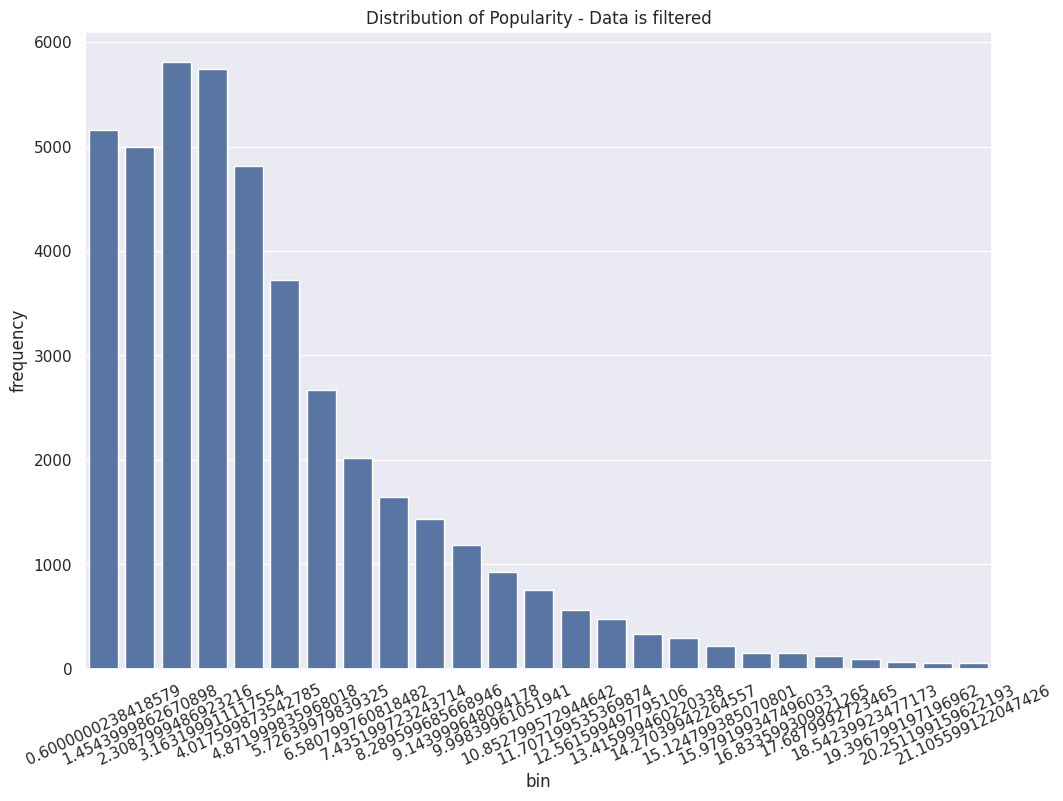

In [ ]:
# Filtering the data to get a better understanding of data
df_fil=df.filter('popularity<22')

# Processing the data in Spark. We can use the histogram function from the RDD
histogram_data = df_fil.select('popularity').rdd.flatMap(lambda x: x).histogram(25)

# Loading the computed histogram into a pandas DataFrame for plotting
hist_df=pd.DataFrame(list(zip(*histogram_data)), columns=['bin', 'frequency'])

# Plotting the data
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=hist_df['bin'], y=hist_df['frequency'])
plt.xticks(rotation=25)
plt.title('Distribution of Popularity - Data is filtered')
plt.show()

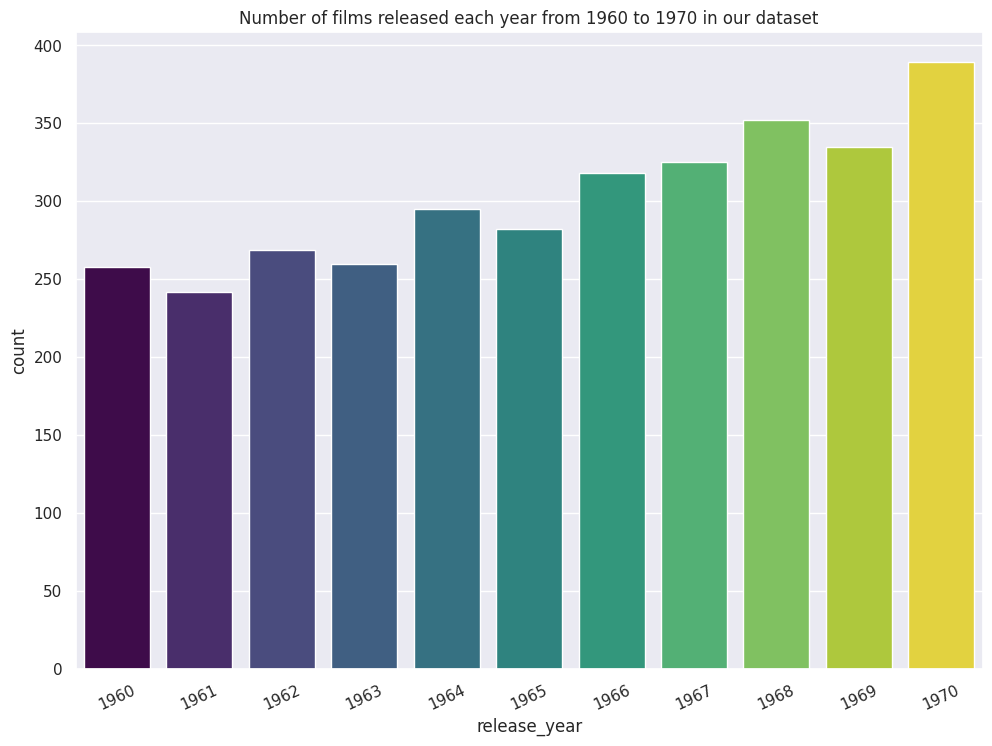

In [ ]:
# Step 1: Preparing the data using Spark functions and converting to pandas DataFrame
df_cat=df.filter("(release_year>1959) and (release_year<1971)").groupby('release_year').count().toPandas()

# Step 2: Sorting the values for display
df_cat=df_cat.sort_values(by=['release_year'], ascending=False)

# Step 3: Plotting the data
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df_cat['release_year'],y=df_cat['count'], hue=df_cat['release_year'], palette='viridis', legend=False)
plt.xticks(rotation=25)
plt.title('Number of films released each year from 1960 to 1970 in our dataset')
plt.show()